In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('ex1data1.txt', header=None)

Import the necessary libraries and load the given data using pandas

In [3]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


View the data that has been loaded

In [4]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit vs Population')

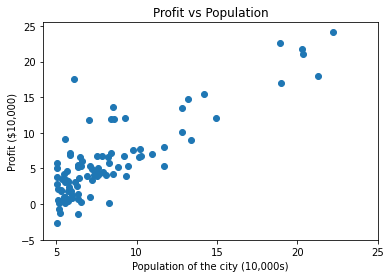

In [9]:
plt.scatter(data[0], data[1])
plt.xticks(np.arange(5,30, step=5))
plt.yticks(np.arange(-5,30, step=5))
plt.xlabel("Population of the city (10,000s)")
plt.ylabel("Profit ($10,000)")
plt.title("Profit vs Population")

Plot the data on a "Profit vs Population" chart using matplotlib

In [11]:
def computeCost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y)**2

    return ( 1/(2*m) * np.sum(square_err) )

Take the numpy arrat X, y, theta and generate the Cost Function of using theta as parameter in a Linear Regression Model

In [12]:
data_n = data.values
m = len( data_n[:,-1] )
X = np.append( np.ones((m,1)), data_n[:,0].reshape(m,1), axis=1 )
y = data_n[:,1].reshape(m,1)
theta = np.zeros( (2,1) )

computeCost(X,y,theta)

32.072733877455676

In [13]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking   num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

theta,J_history = gradientDescent(X,y,theta,0.01,1500)

print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.63 + 1.17x1


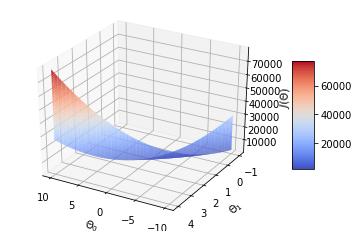

In [15]:
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

#rotate for better angle
ax.view_init(30,120)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

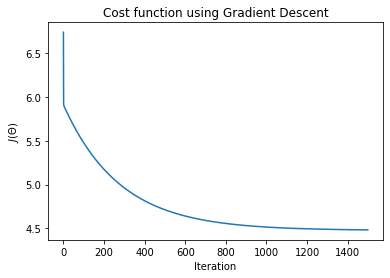

In [16]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit vs Population')

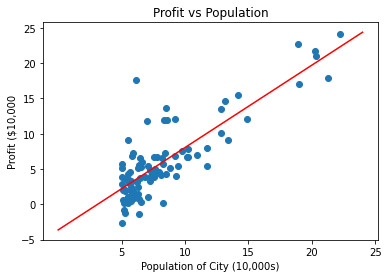

In [17]:
plt.scatter(data[0],data[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit vs Population")

In [18]:
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    predictions= np.dot(theta.transpose(),x)
    
    return predictions[0]

predict1=predict(np.array([1,3.5]),theta)*10000

print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))

For population = 35,000, we predict a profit of $4520.0


In [19]:
predict2=predict(np.array([1,7]),theta)*10000
print("For population = 70,000, we predict a profit of $"+str(round(predict2,0)))

For population = 70,000, we predict a profit of $45342.0
